In [1]:
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#SK Learn
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression

#Stats
from scipy.stats import pearsonr, spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

from importlib import reload

#My imports
import wrangle as w
import env
import model as m

In [2]:
df = w.get_zillow_data()

In [3]:
df.head(2)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,transactiondate,parcelid
0,4.0,3.5,3100.0,6059.0,33634931.0,-117869207.0,4506.0,1998.0,1023282.0,2017-01-01,14297519
1,2.0,1.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,1967.0,464000.0,2017-01-01,17052889


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52442 non-null  float64
 1   bathroomcnt                   52442 non-null  float64
 2   calculatedfinishedsquarefeet  52360 non-null  float64
 3   fips                          52442 non-null  float64
 4   latitude                      52442 non-null  float64
 5   longitude                     52442 non-null  float64
 6   lotsizesquarefeet             52073 non-null  float64
 7   yearbuilt                     52326 non-null  float64
 8   taxvaluedollarcnt             52441 non-null  float64
 9   transactiondate               52442 non-null  object 
 10  parcelid                      52442 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 4.4+ MB


In [5]:
#Clean the data, removing nulls, duplicates, and outliers
df = w.clean_zillow(df)

In [6]:
df.head(2)

,bedrooms,bathrooms,square_feet,fips,latitude,longitude,lot_size,year_built,tax_value,transaction_date,parcel_id,county,home_age
0,4,3.5,3100,6059,33634931.0,-117869207.0,4506.0,1998,1023282,2017-01-01,14297519,Orange,19
1,2,1.0,1465,6111,34449266.0,-119281531.0,12647.0,1967,464000,2017-01-01,17052889,Ventura,50


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49914 entries, 0 to 52441
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          49914 non-null  int64  
 1   bathrooms         49914 non-null  float64
 2   square_feet       49914 non-null  int64  
 3   fips              49914 non-null  int64  
 4   latitude          49914 non-null  float64
 5   longitude         49914 non-null  float64
 6   lot_size          49914 non-null  float64
 7   year_built        49914 non-null  int64  
 8   tax_value         49914 non-null  int64  
 9   transaction_date  49914 non-null  object 
 10  parcel_id         49914 non-null  int64  
 11  county            49914 non-null  object 
 12  home_age          49914 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 5.3+ MB


In [8]:
#Splitting our data
train, validate, test = w.train_validate_test_split(df)

In [9]:
train.head(2)

,bedrooms,bathrooms,square_feet,fips,latitude,longitude,lot_size,year_built,tax_value,transaction_date,parcel_id,county,home_age
22349,4,2.5,1922,6111,34291222.0,-119214999.0,7884.0,1967,554066,2017-05-05,17071716,Ventura,50
1037,3,2.0,1660,6037,34113036.0,-117867106.0,7656.0,1962,512588,2017-01-09,13036208,Los Angeles,55


In [10]:
print(f' Train length is {len(train)} rows')
print(f' Validate length is {len(validate)} rows')
print(f' Test length is {len(test)} rows')

 Train length is 34937 rows
 Validate length is 7489 rows
 Test length is 7488 rows


In [ ]:
## Need to find a place to create dummies
#Make dummy variables from county
## df = pd.get_dummies(df, columns=['county'], drop_first=False)

## Categorical Variable Exploration

In [ ]:
#Breaking down continuous vs categorical variables
cat_vars = ['bedrooms', 'county']
cont_vars = ['bathrooms', 'square_feet', 'lot_size', 'tax_value', 'home_age']

In [ ]:
def plot_categorical_and_continuous_vars(df, cat_vars, cont_vars):
    for col in cat_vars:
        for col2 in cont_vars:
            fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))
            fig.suptitle(f'{col} vs. {col2}')
            sns.boxplot(data=df, x=col, y=col2, ax=ax1)
            sns.violinplot(data=df, x=col, y=col2, ax=ax2)
            sns.barplot(data=df, x=col, y=col2, ax=ax3)
            plt.show()

In [ ]:
plot_categorical_and_continuous_vars(train, cat_vars, cont_vars)

In [ ]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'home_age']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    train[col].hist(bins=10)
    # Hide gridlines.
    plt.grid(False)

In [ ]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

### Bedrooms

In [ ]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.bedrooms)
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Bedrooms Histogram')
 
# Show plot
plt.show()

In [ ]:
#Displot
sns.displot(x='bedrooms', data=train, bins=5)
plt.title('bedrooms')
plt.show()

### Continuous Variable Exploration

In [ ]:
#Visualize other numeric data
# Plot numeric columns
for col in cont_vars:
    print(f'Mean {col} is: {train[col].mean()}')
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()
    sns.displot(train[col])
    plt.title(col)
    plt.show()

In [ ]:
#Descriptive statistics
print(f'Mean bedrooms = {train.bedrooms.mean()}')
print(f'Median Bedrooms = {train.bedrooms.median()}')
print(f'Mode Bedrooms = {train.bedrooms.mode()}')
print(f'Max Bedrooms = {train.bedrooms.max()}')
print(f'Min Bedrooms = {train.bedrooms.min()}')

In [ ]:
#Bathrooms in train data set
train.bathrooms.value_counts()

In [ ]:
#Descriptive statistics of bathrooms
print(f'Mean Bathrooms = {train.bathrooms.mean()}')
print(f'Median Bathrooms = {train.bathrooms.median()}')
print(f'Mode Bathrooms = {train.bathrooms.mode()}')
print(f'Max Bathrooms = {train.bathrooms.max()}')
print(f'Min Bathrooms = {train.bathrooms.min()}')

In [ ]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
ax.hist(train.bathrooms, bins = [0, 1,2,3,4,5])
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Bathrooms Histogram')
 
# Show plot
plt.show()

In [ ]:
#Displot
sns.displot(x='bathrooms', data=train, bins=5)
plt.title('bathrooms')
plt.show()

In [ ]:
sns.pairplot(train)

In [ ]:
#Square Feet versus tax Value
sns.relplot(train['square_feet'], train['tax_value'], data=train)

In [ ]:
#Square Feet versus tax Value
sns.lmplot(x='square_feet', y='tax_value', data=train, scatter=True, line_kws={'color': 'red'})

In [ ]:
#bathrooms versus tax Value
sns.relplot(train['home_age'], train['tax_value'], data=train)

In [ ]:
sns.jointplot(x, y, data=train, kind=scatter)

## Modeling

In [ ]:
#Scale data for modeling
train,validate,test = m.scale_data(train,validate,test, columns_to_scale = ['bedrooms', 'bathrooms', 'square_feet'], return_scaler=False)

In [ ]:
train.head(2)

In [ ]:
#Prepare for modeling using model 1
X_train, X_validate, X_test, y_train, y_validate, y_test = m.model1_prep(train,validate,test)

In [ ]:
X_train.head(2)

In [ ]:
#Create Baseline using median
baseline = train.tax_value.median()
baseline

### Evaluating Residuals with chosen method of polynomial features/linear regression

In [ ]:
#Build the model, choosing polynomial regression
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree3 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf.transform(X_validate)
X_test_degree3 = pf.transform(X_test)

In [ ]:
# create the model object
plr = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
plr.fit(X_train_degree3, y_train.tax_value)

# predict train
y_train['tax_value_pred_plr'] = plr.predict(X_train_degree3)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_plr)**(1/2)

# predict validate
y_validate['tax_value_pred_plr'] = plr.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_plr)**(1/2)

print("RMSE for Polynomial Model, degrees=3\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

In [ ]:
y_train.head(2)

In [ ]:
X_train.head(2)

In [ ]:
#Creating basemodel to evaluate residuals
basemodel = train

In [ ]:
keep_cols = ['bedrooms', 'bathrooms', 'square_feet', 'tax_value']
basemodel = basemodel[keep_cols]

In [ ]:
basemodel.head(2)

In [ ]:
yhat = y_train.tax_value_pred_plr

In [ ]:
yhat.head(5)

In [ ]:
y_train.tax_value_pred_plr

In [ ]:
# compute residuals
basemodel['yhat_baseline'] = df['tax_value'].median()
basemodel.head(3)

basemodel['residual'] = y_train['tax_value_pred_plr'] - basemodel['tax_value']

basemodel['residual_baseline'] = basemodel['yhat_baseline'] - basemodel['tax_value']

In [ ]:
basemodel['yhat'] = y_train['tax_value_pred_plr']

In [ ]:
basemodel.head(2)

In [ ]:
yhat.loc[[22349]]

In [ ]:
y_train.loc[[22349]]

In [ ]:
basemodel.loc[[22349]]

### Examining RFE to select features to move to modeling iteration 2

In [11]:
train.head(2)

,bedrooms,bathrooms,square_feet,fips,latitude,longitude,lot_size,year_built,tax_value,transaction_date,parcel_id,county,home_age
22349,4,2.5,1922,6111,34291222.0,-119214999.0,7884.0,1967,554066,2017-05-05,17071716,Ventura,50
1037,3,2.0,1660,6037,34113036.0,-117867106.0,7656.0,1962,512588,2017-01-09,13036208,Los Angeles,55


In [12]:
#Make dummy variables from county
train = pd.get_dummies(train, columns=['county'], drop_first=False)

In [13]:
#Drop Columns not needed for modeling
train = train.drop(['fips', 'latitude', 'longitude', 'year_built', 'transaction_date', 'parcel_id'], axis=1)
validate = validate.drop(['fips', 'latitude', 'longitude', 'year_built', 'transaction_date', 'parcel_id'], axis=1)
test = test.drop(['fips', 'latitude', 'longitude', 'year_built', 'transaction_date', 'parcel_id'], axis=1)

In [14]:
train.head(2)

,bedrooms,bathrooms,square_feet,lot_size,tax_value,home_age,county_Los Angeles,county_Orange,county_Ventura
22349,4,2.5,1922,7884.0,554066,50,0,0,1
1037,3,2.0,1660,7656.0,512588,55,1,0,0


In [15]:
#Scale our data for modeling
train, validate, test = m.scale_data(
    train,validate,test,columns_to_scale=['bedrooms','bathrooms','square_feet','lot_size','home_age'],
    return_scaler=False
                                    )

In [16]:
train.head(2)

,bedrooms,bathrooms,square_feet,lot_size,tax_value,home_age,county_Los Angeles,county_Orange,county_Ventura
22349,0.6,0.454545,0.344626,0.001097,554066,0.355072,0,0,1
1037,0.4,0.363636,0.293614,0.001064,512588,0.391304,1,0,0


In [17]:
#Split data into predicting variables (X) and target variable (y) and reset the index for each dataframe
X_train = train.drop(columns='tax_value').reset_index(drop=True)
y_train = train[['tax_value']].reset_index(drop=True)

X_validate = validate.drop(columns='tax_value').reset_index(drop=True)
y_validate = validate[['tax_value']].reset_index(drop=True)

X_test = test.drop(columns='tax_value').reset_index(drop=True)
y_test = test[['tax_value']].reset_index(drop=True)

### Trying RFE first with linear regression (either normalize = True or not)

In [18]:
# initialize the ML algorithm
lm = LinearRegression(normalize=True)

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=3)

# fit the data using RFE
rfe.fit(X_train, y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()
rfe_feature

['county_Los Angeles', 'county_Orange', 'county_Ventura']

#### Changing n features to select from 3-5 gives different results. 

### RFE with lasso lars

In [19]:
# initialize the ML algorithm
lars = LassoLars(alpha=1.0)

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lars, n_features_to_select=3)

# fit the data using RFE
rfe.fit(X_train, y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()
rfe_feature

['bedrooms', 'bathrooms', 'square_feet']

In [25]:
lars

LassoLars()

#### Lasso Lars seems to be more consistent, giving bedrooms, bathrooms, square feet, and then adding on as you increase n features to select

### RFE Tweedie Regressor

In [20]:
# create the model object
glm = TweedieRegressor(power=0, alpha=1.0)
# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(glm, n_features_to_select=3)

# fit the data using RFE
rfe.fit(X_train, y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()
rfe_feature

['bathrooms', 'square_feet', 'county_Los Angeles']

#### Not sure if Tweedie will end up being a good fit for final model, but bathrooms, square feet, and county LA seem to be the most driving. Lot Size and bedrooms become important as you add to n features to select

### RFE Polynomial Regression

In [24]:
#Create the model object
pf = PolynomialFeatures(degree=3)
pf.fit_transform(X_train)

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(pf, n_features_to_select=3)

# fit the data using RFE
rfe.fit(X_train, y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()
rfe_feature

ValueError: when `importance_getter=='auto'`, the underlying estimator PolynomialFeatures should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

### Evaluate Using Select K Best

In [28]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 4 features
f_selector = SelectKBest(f_regression, k=4)

# find the top 4 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()
f_feature

['bedrooms', 'bathrooms', 'square_feet', 'home_age']

In [ ]:
#Drop Columns not coming into modeling
#train = train.drop(['fips', 'latitude', 'longitude', 'year_built', 'transaction_date', 'parcel_id'], axis=1)

In [ ]:
train.head(2)

In [30]:
#Heatmap
# Create the correlation matrix for all exams.

zillow_corr = train.corr()
zillow_corr

,bedrooms,bathrooms,square_feet,lot_size,tax_value,home_age,county_Los Angeles,county_Orange,county_Ventura
bedrooms,1.000000,0.623051,0.633182,0.000990,0.258601,-0.391028,-0.169557,0.117605,0.104072
bathrooms,0.623051,1.000000,0.823024,0.018264,0.478178,-0.556323,-0.189891,0.157683,0.075122
square_feet,0.633182,0.823024,1.000000,0.028478,0.552214,-0.498617,-0.193812,0.154094,0.087590
lot_size,0.000990,0.018264,0.028478,1.000000,0.007203,-0.032292,0.020784,-0.025146,0.004358
tax_value,0.258601,0.478178,0.552214,0.007203,1.000000,-0.237013,-0.163159,0.148454,0.043860
home_age,-0.391028,-0.556323,-0.498617,-0.032292,-0.237013,1.000000,0.368953,-0.288249,-0.174867
county_Los Angeles,-0.169557,-0.189891,-0.193812,0.020784,-0.163159,0.368953,1.000000,-0.820612,-0.411194
county_Orange,0.117605,0.157683,0.154094,-0.025146,0.148454,-0.288249,-0.820612,1.000000,-0.183507
county_Ventura,0.104072,0.075122,0.087590,0.004358,0.043860,-0.174867,-0.411194,-0.183507,1.000000


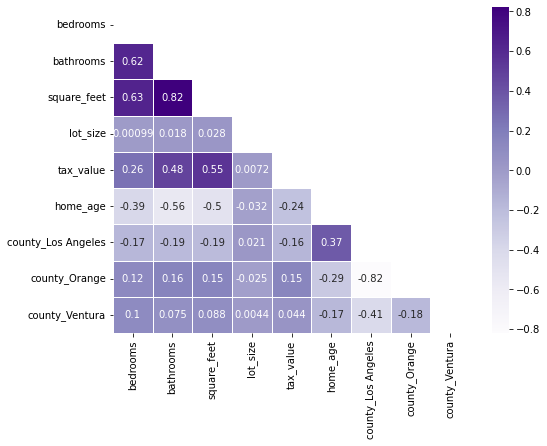

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(zillow_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(zillow_corr))
plt.show()

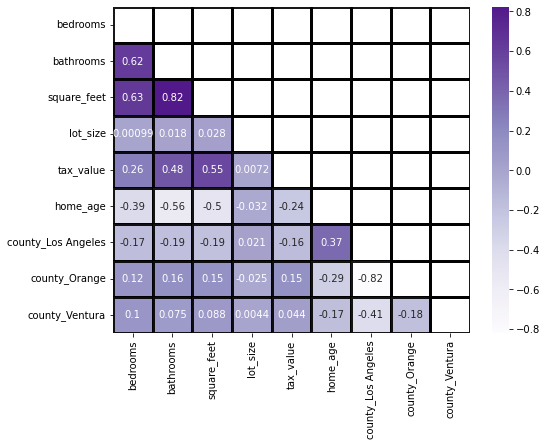

In [35]:
# Pass my correlation matrix to Seaborn's heatmap.

kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}

plt.figure(figsize=(8,6))
sns.heatmap(zillow_corr, cmap='Purples', annot=True, mask= np.triu(zillow_corr), **kwargs)
plt.show()

### Statistical testing

### Testing Variance Inflation Factor

In [36]:
#Need to make county a dummy variable so I can use it in this
#Make dummy variables from county and rename them to make it easier
#train = pd.get_dummies(train, columns=['county'], drop_first=False)
train = train.rename(columns = {'county_Los Angeles':'LA', 'county_Orange':'Orange','county_Ventura':'Ventura'})

In [37]:
train.head()

,bedrooms,bathrooms,square_feet,lot_size,tax_value,home_age,LA,Orange,Ventura
22349,0.6,0.454545,0.344626,0.001097,554066,0.355072,0,0,1
1037,0.4,0.363636,0.293614,0.001064,512588,0.391304,1,0,0
45720,0.2,0.181818,0.169003,0.001036,203468,0.673913,1,0,0
530,0.8,0.545455,0.384930,0.001052,598997,0.369565,0,1,0
17785,0.6,0.454545,0.329439,0.001788,80685,0.362319,0,0,1


In [59]:
#Using all variables for this first
X = train[['square_feet','bathrooms','home_age', 'LA']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,square_feet,17.479632
1,bathrooms,19.415571
2,home_age,4.124628
3,LA,3.269768
